In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas_profiling

In [2]:
data = pd.read_csv("../train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Explorer le dataset

In [3]:
# récupérer quelques détails sur les différents champs (format et remplissage)
data.info()
#Supprimer la colonne Id qui n'apportera rien à l'analyse.
data.drop(['Id'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#Tour d'horizon plus précis du dataset
data.profile_report()

# Améliorer l'interprétabilité des données :
- Remplacer les valeurs ordinales par un classement numérique
- Rassembler les éléments de colonnes qui se complètent dans une colonne unique

In [5]:
#remplacer les valeurs ordinales par un classement numérique
def catversnum (col):
    colnum = col.replace('NA',0).replace('Po',1).replace('TA',2).replace('Fa',3).replace('Gd',4).replace('Ex',5)
    pd.to_numeric(colnum)
    return colnum

colonnes = ['PoolQC','GarageCond','GarageQual','KitchenQual','FireplaceQu','HeatingQC','BsmtCond','ExterQual','ExterCond','BsmtQual']
for colonne in colonnes:
    data[colonne] = catversnum(data[colonne])
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [6]:
#remplacer les valeurs ordinales par un classement numérique
data.LotShape = data.LotShape.replace('IR3',0).replace('IR2',1).replace('IR1',2).replace('Reg',3)
data.LandSlope = data.LandSlope.replace('Gtl',0).replace('Mod',1).replace('Sev',2)
data.Fence = data.LotShape.replace('NA',0).replace('MnWw',1).replace('GdWo',2).replace('MnPrv',3).replace('GdPrv',4)
data.BsmtExposure = data.BsmtExposure.replace('No',0).replace('Mn',1).replace('Av',2).replace('Gd',3)
pd.to_numeric(data.LotShape)
pd.to_numeric(data.LandSlope)
pd.to_numeric(data.Fence)
pd.to_numeric(data.BsmtExposure)
pd.to_numeric(data.GarageYrBlt)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley  LotShape  \
0          60       RL         65.0     8450   Pave   NaN         3   
1          20       RL         80.0     9600   Pave   NaN         3   
2          60       RL         68.0    11250   Pave   NaN         2   
3          70       RL         60.0     9550   Pave   NaN         2   
4          60       RL         84.0    14260   Pave   NaN         2   

  LandContour Utilities LotConfig  ...  PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...         0    NaN     3         NaN   
1         Lvl    AllPub       FR2  ...         0    NaN     3         NaN   
2         Lvl    AllPub    Inside  ...         0    NaN     2         NaN   
3         Lvl    AllPub    Corner  ...         0    NaN     2         NaN   
4         Lvl    AllPub       FR2  ...         0    NaN     2         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [7]:
# Rassemble en 1 colonne les colonnes qui se complètent
data['BsmtFinType'] = data.BsmtFinType1+" - "+data.BsmtFinType2
data['Condition'] = data.Condition1+" - "+data.Condition2
data['SurfaceHabitable'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# Analyser les principales caractéristiques de la valeur étudiée

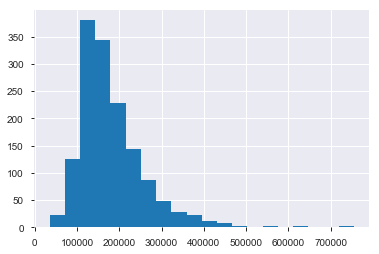

In [8]:
data.SalePrice.hist(bins = 20)

In [9]:
#La distribution semble normale, on va le vérifier par un test :
stats.normaltest(data.SalePrice)

NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)

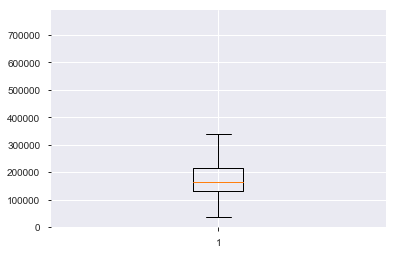

In [10]:
# La p-value extrèmement faible confirme la normalité de la variable étudiée.
plt.boxplot(data.SalePrice)
plt.show()

In [11]:
# On voit ici se confirmer ce que montre l'histogramme : asymétrie de la distribution,
# la répartition des prix a tendance à être plus concentrée en-deça de la moyenne qu'au-delà.
# + qqes valeurs extrêmes à noter.

# Tester toutes les colonnes selon leur nature

In [12]:
#3 fonctions qui appliquent chacune 1 test, pour récupérer à chaque fois un élément comparable quel que soit le test appliqué : la p value.
pvalues = []
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diagnostic
def ttest (col):
    valeurs = data[col].unique()
    val1 = data[data[col]==valeurs[0]]
    val2 = data[data[col]==valeurs[1]]
    result = ttest_ind(val1.SalePrice, val2.SalePrice, equal_var=False)[1]
    return pvalues.append([col, result])

def anova(col):
    texte = 'SalePrice ~ C(data.'+col+')'
    model = ols(texte, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return pvalues.append([col, anova_table['PR(>F)'][0]])

def pearson(col):
    pvalue = stats.pearsonr(data[col], data['SalePrice'])[1]
    if pvalue < 0.05:
        return pvalues.append([col,pvalue,'significatif'])
    else:
        data[col].fillna(0, inplace = True)
        model = sm.OLS(data.SalePrice, data[col]).fit()
        #diagn = diagnostic.linear_harvey_collier(model)
        print(model)
        return pvalues.append([col,pvalue,'ICI !!!!!!!'])

    
# La boucle identifie quel test appliquer à quelle colonne, et fait le test.

for col in data.columns:
    if (data[col].nunique() == 2) & (data[col].dtypes == 'object'):
        ttest(col)
    elif data[col].dtypes == 'object':
        anova(col)
    else:
        pearson(col)
print(pvalues)

[['MSSubClass', 0.0012664716847495552, 'significatif'], ['MSZoning', 8.817633866259116e-35], ['LotFrontage', 1.0, 'ICI !!!!!!!'], ['LotArea', 1.1231391549187896e-24, 'significatif'], ['Street', 0.11504797250476277], ['Alley', nan], ['LotShape', 2.162559671723943e-25, 'significatif'], ['LandContour', 2.7422167521379096e-08], ['Utilities', nan], ['LotConfig', 3.163167473604189e-06], ['LandSlope', 0.050685853827704394, 'ICI !!!!!!!'], ['Neighborhood', 1.5586002827707996e-225], ['Condition1', 8.904549416141385e-08], ['Condition2', 0.043425658360948464], ['BldgType', 2.0567364604967015e-10], ['HouseStyle', 3.376776535121222e-25], ['OverallQual', 2.185675268e-313, 'significatif'], ['OverallCond', 0.0029123512679157704, 'significatif'], ['YearBuilt', 2.9902290990135257e-103, 'significatif'], ['YearRemodAdd', 3.1649482419182807e-96, 'significatif'], ['RoofStyle', 3.65352304710668e-17], ['RoofMatl', 7.231444779983899e-08], ['Exterior1st', 2.586088728635059e-43], ['Exterior2nd', 4.84218567069455

In [13]:
#Identification des p values les plus faibles

correlations = pd.DataFrame(pvalues)
correlations.set_index(0, inplace=True)
select_corr = correlations.sort_values(1,ascending=True,inplace=False)[1:12]
data_select = data[select_corr.index]
data_select = pd.concat([data_select, data.SalePrice], axis = 1)
data_select.head()

OverallQual  SurfaceHabitable Neighborhood  GrLivArea  ExterQual  \
0            7              2566      CollgCr       1710          4   
1            6              2524      Veenker       1262          2   
2            7              2706      CollgCr       1786          4   
3            7              2473      Crawfor       1717          2   
4            8              3343      NoRidge       2198          4   

   GarageCars  GarageArea  KitchenQual  TotalBsmtSF  1stFlrSF  FullBath  \
0           2         548            4          856       856         2   
1           2         460            2         1262      1262         2   
2           2         608            4          920       920         2   
3           3         642            4          756       961         1   
4           3         836            4         1145      1145         2   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [14]:
#il y a des redondances dans les colonnes sélectionnées
#Pour les éviter, on supprime la surface du garage (on conserve le nb de voitures à garer), et les parties de surfaces habitables, qui doublent la surface totale
data_select.drop(['GarageArea','1stFlrSF','TotalBsmtSF','GrLivArea'], axis = 1, inplace = True)
data_select.head()

OverallQual  SurfaceHabitable Neighborhood  ExterQual  GarageCars  \
0            7              2566      CollgCr          4           2   
1            6              2524      Veenker          2           2   
2            7              2706      CollgCr          4           2   
3            7              2473      Crawfor          2           3   
4            8              3343      NoRidge          4           3   

   KitchenQual  FullBath  SalePrice  
0            4         2     208500  
1            2         2     181500  
2            4         2     223500  
3            4         1     140000  
4            4         2     250000

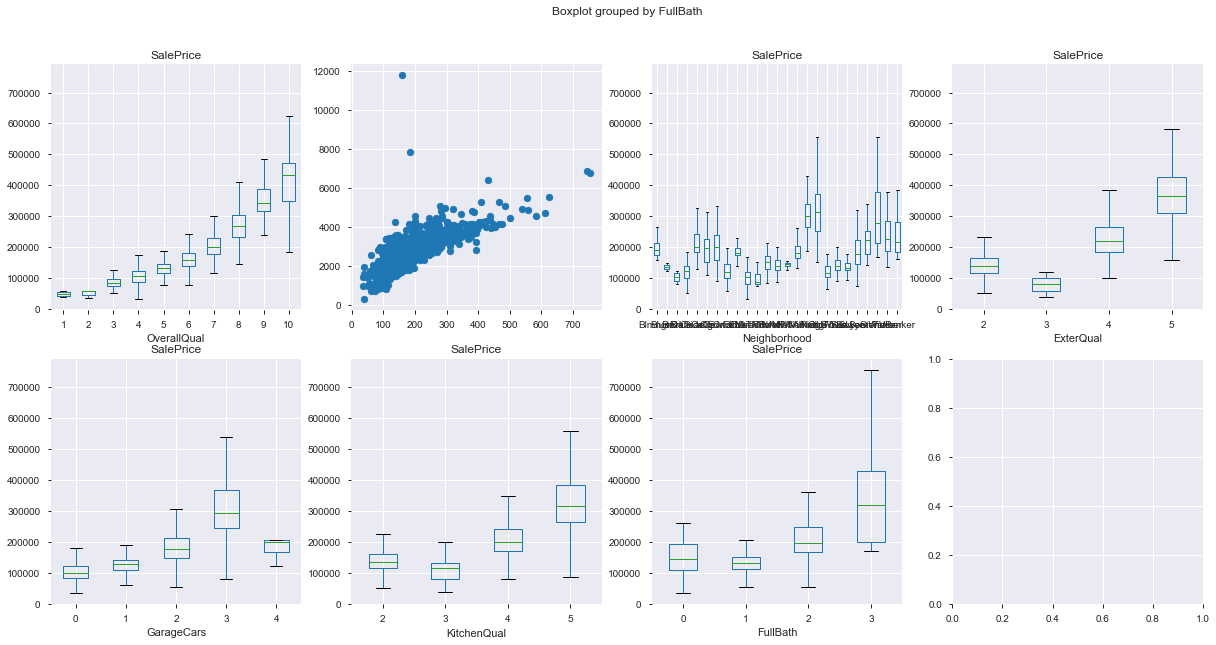

In [15]:
# Représentation des corrélations des variables sélectionnées avec le SalePrice

fig, ax = plt.subplots(figsize = (20,10), nrows = 2, ncols = 4)
data_select.boxplot(column = 'SalePrice', by = 'OverallQual', ax = ax[0, 0])
ax[0, 1].scatter(data_select.SalePrice/1000,data_select.SurfaceHabitable)
#ax[0, 1].title = 'test'
data_select.boxplot(column = 'SalePrice', by = 'Neighborhood', ax = ax[0, 2])
data_select.boxplot(column = 'SalePrice', by = 'ExterQual', ax = ax[0, 3])
data_select.boxplot(column = 'SalePrice', by = 'GarageCars', ax = ax[1, 0])
data_select.boxplot(column = 'SalePrice', by = 'KitchenQual', ax = ax[1, 1])
data_select.boxplot(column = 'SalePrice', by = 'FullBath', ax = ax[1, 2])

In [26]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diagnostic
data.LandSlope.fillna(0, inplace = True)
model = sm.OLS(data.SalePrice, data.LandSlope).fit()

diagnostic = diagnostic.linear_harvey_collier(model)

residus = model.resid
model

LinAlgError: Singular matrix

Ttest_1sampResult(statistic=3.7493767714247963, pvalue=0.0001842165713940366)

In [29]:
data.LandSlope.unique()

array([0, 1, 2], dtype=int64)

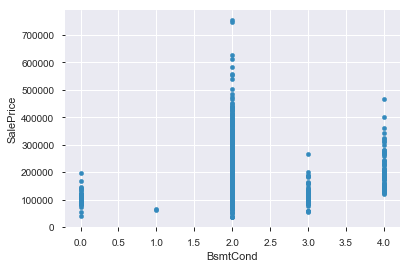

In [105]:
data[['SalePrice', 'BsmtCond']].plot(kind = 'scatter', x = 'BsmtCond', y = 'SalePrice')

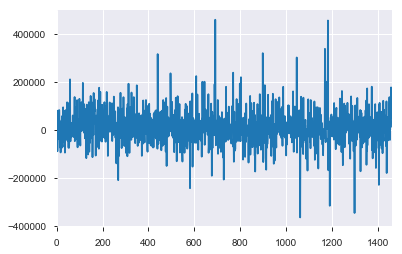

In [98]:
residus.plot()

In [106]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(data_select.SalesPrice, data_select.SurfaceHabitable)
Surface_corr = linear_regressor.predict(data_select.SalesPrice)

plt.scatter(data_select.SalesPrice, data_select.SurfaceHabitable)
plt.plot(Surface_corr, color='red')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'SalesPrice'

In [112]:
sns.set_style("white")
gridobj = sns.lmplot(x="SurfaceHabitable", y="SalesPrice", data=data_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

KeyError: "None of [Index(['SalesPrice', 'SurfaceHabitable'], dtype='object')] are in the [columns]"

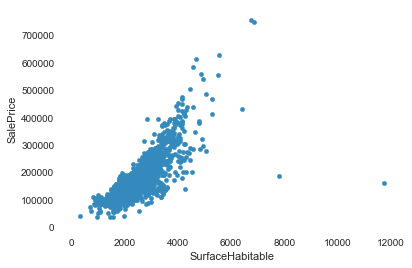

In [108]:
data[['SalePrice', 'SurfaceHabitable']].plot(kind = 'scatter', x = 'SurfaceHabitable', y = 'SalePrice')

In [19]:
bins = pd.cut(data.SalePrice,10)#, labels=mpg_labels)
data_objects = pd.concat([data_objects, bins], axis = 1)
data_objects_full = data_objects.drop(['Alley','MiscFeature'], axis = 1, inplace = False)
data_objects_full.head()

MSZoning Street LandContour Utilities LotConfig Neighborhood Condition1  \
0       RL   Pave         Lvl    AllPub    Inside      CollgCr       Norm   
1       RL   Pave         Lvl    AllPub       FR2      Veenker      Feedr   
2       RL   Pave         Lvl    AllPub    Inside      CollgCr       Norm   
3       RL   Pave         Lvl    AllPub    Corner      Crawfor       Norm   
4       RL   Pave         Lvl    AllPub       FR2      NoRidge       Norm   

  Condition2 BldgType HouseStyle  ... Electrical Functional GarageType  \
0       Norm     1Fam     2Story  ...      SBrkr        Typ     Attchd   
1       Norm     1Fam     1Story  ...      SBrkr        Typ     Attchd   
2       Norm     1Fam     2Story  ...      SBrkr        Typ     Attchd   
3       Norm     1Fam     2Story  ...      SBrkr        Typ     Detchd   
4       Norm     1Fam     2Story  ...      SBrkr        Typ     Attchd   

  GarageFinish PavedDrive SaleType SaleCondition BsmtFinType     Condition  \
0          RFn          Y       WD        Normal   GLQ - Unf   Norm - Norm   
1          RFn          Y       WD        Normal   ALQ - Unf  Feedr - Norm   
2          RFn          Y       WD        Normal   GLQ - Unf   Norm - Norm   
3          Unf          Y       WD       Abnorml   ALQ - Unf   Norm - Norm   
4          RFn          Y       WD        Normal   GLQ - Unf   Norm - Norm   

              SalePrice  
0  (178920.0, 250930.0]  
1  (178920.0, 250930.0]  
2  (178920.0, 250930.0]  
3  (106910.0, 178920.0]  
4  (178920.0, 250930.0]  

[5 rows x 30 columns]

In [20]:
liste_corr_objects = []
for col in data_objects_full.columns:
    crosstab = pd.crosstab(data_objects_full.SalePrice,col)
    st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(crosstab)
    liste_corr_objects.append([col, st_p])
correlations = pd.DataFrame(liste_corr_objects)
correlations.set_index(0, inplace=True)
select_corr = correlations.sort_values(1,ascending=True,inplace=False)[1:10]
data_select_objects = data_objects_full[select_corr.index]
#data_select_objects = pd.concat([data_select_objects, data.SalePrice], axis = 1)
data_select_objects.head()

BsmtFinType SaleCondition SaleType PavedDrive GarageFinish GarageType  \
0   GLQ - Unf        Normal       WD          Y          RFn     Attchd   
1   ALQ - Unf        Normal       WD          Y          RFn     Attchd   
2   GLQ - Unf        Normal       WD          Y          RFn     Attchd   
3   ALQ - Unf       Abnorml       WD          Y          Unf     Detchd   
4   GLQ - Unf        Normal       WD          Y          RFn     Attchd   

  Functional Electrical CentralAir  
0        Typ      SBrkr          Y  
1        Typ      SBrkr          Y  
2        Typ      SBrkr          Y  
3        Typ      SBrkr          Y  
4        Typ      SBrkr          Y

In [21]:
crosstab = pd.crosstab(data_objects_full.SalePrice,data_objects_full.SaleCondition)
st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(crosstab)
crosstab

SaleCondition         Abnorml  AdjLand  Alloca  Family  Normal  Partial
SalePrice                                                              
(34179.9, 106910.0]        27        2       2       3     114        0
(106910.0, 178920.0]       53        2       5      13     627       23
(178920.0, 250930.0]       14        0       3       3     309       44
(250930.0, 322940.0]        5        0       1       1     104       24
(322940.0, 394950.0]        1        0       1       0      32       17
(394950.0, 466960.0]        0        0       0       0       7       12
(466960.0, 538970.0]        0        0       0       0       2        2
(538970.0, 610980.0]        0        0       0       0       1        2
(610980.0, 682990.0]        0        0       0       0       1        1
(682990.0, 755000.0]        1        0       0       0       1        0

In [24]:
liste_corr_dummies = []
for col in dummies.columns:
    corr = abs(data['SalePrice'].corr(dummies[col]))
    liste_corr_dummies.append([col,corr])
correlations = pd.DataFrame(liste_corr_dummies)
correlations.set_index(0, inplace=True)
select_corr = correlations.sort_values(1,ascending=False,inplace=False)[:12]
data_select_dummies = dummies[select_corr.index]
data_select_dummies = pd.concat([data_select_dummies, data.SalePrice], axis = 1)
data_select_dummies.head()

BsmtFinType_GLQ - Unf  GarageFinish_Fin  GarageFinish_Unf  SaleType_New  \
0                      1                 0                 0             0   
1                      0                 0                 0             0   
2                      1                 0                 0             0   
3                      0                 0                 1             0   
4                      1                 0                 0             0   

   GarageType_Detchd  SaleCondition_Partial  GarageType_Attchd  CentralAir_Y  \
0                  0                      0                  1             1   
1                  0                      0                  1             1   
2                  0                      0                  1             1   
3                  1                      0                  0             1   
4                  0                      0                  1             1   

   CentralAir_N  SaleType_WD  Electrical_SBrkr  GarageType_BuiltIn  SalePrice  
0             0            1                 1                   0     208500  
1             0            1                 1                   0     181500  
2             0            1                 1                   0     223500  
3             0            1                 1                   0     140000  
4             0            1                 1                   0     250000